<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Jonathan Tautiva Cely  <br>
Fecha: 11/01/2025

# Importación de librerias necesarias

In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Parte II. Clasificación

In [2]:
#Para esta actividad se importarán las siguientes librerías:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential, layers, models

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [3]:
url = "https://raw.githubusercontent.com/Jona-24/Act2_TecnicasIA/refs/heads/main/data/MBA.csv"
df = pd.read_csv(url, sep=",")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

El data set representa un proceso de admisiones de estudiantes a un MBA, en el se muestran como variables independientes las características de los estudiantes aspirantes y como variable dependiente el resultado de la admision obtenida para cada aspirante al MBA.
La fuente de este data set es kaggle: https://www.kaggle.com/datasets/taweilo/mba-admission-dataset



## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

El problema consiste en conocer si a traves de los factores sociodemograficos, profesionales y educativos (variables de entrada) se puede predecir si un estudiante sera admitido en un curso de MBA exitosamente o no (variable objetivo), esta información puede ayudar tanto a aspirantes como a instituciones a conocer que aspectos deben mejorar para ser admitidos o en el caso de las instituciones cuales son sus barreras de entrada y monitorearlas. 

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total
    + 6194
>- Número de atributos de entrada, su significado y tipo.
    + 9 atributos
application_id    int64        id del aspirante   
gender           object        genero del aspirante      
international      bool        Es estudiante internacional si/no    
gpa             float64        calificacion en el examen gpa [0,4]  
major            object        Carrera principal del aspirante   
race             object        Raza 
gmat            float64        Calificacion en gmat, maximo 800 puntos  
work_exp        float64        experiencia en años    
work_industry    object        industria en la que trabaja <br>  
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
+   3 Clases, admitido, en lista de espera y vacio, esta ultima realmente representa no admitido
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
+   admission
    NaN         5194
    Admit        900
    Waitlist     100
>- Estadísticas de la variable objetivo.
+  Estadísticas de la variable objetivo 'admission':
count      1000 (realmente son mas, se vera en el preprocesamiento)
unique        2
top       Admit
freq        900 
>- Estadísticas los atributos en relación con la variable objetivo.


Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [4]:
#Código que responde a la descripción anterior

#Número de instancias en total.
df.shape[0]  # Número de filas
print("Número de instancias en total:", df.shape[0])

#Número de atributos en total 
atributos = df.drop(columns=["admission"])

info_atributos = pd.DataFrame({
    "tipo": atributos.dtypes,
    "valores_nulos": atributos.isna().sum(),
    "valores_unicos": atributos.nunique()
})
print("Número de atributos en total:", atributos.shape[1])
print(info_atributos)   
#Instancias pertenecientes a cada clase de la variable objetivo "admission" incluyendo nulos

conteo_clases = df["admission"].value_counts(dropna=False)
print("Instancias pertenecientes a cada clase de la variable objetivo 'admission':")
print(conteo_clases)

#Estadisticas de la variable objetivo "Performance Index"
estadisticas_performance = df["admission"].describe()  
print("Estadísticas de la variable objetivo 'admission':")
print(estadisticas_performance)

#Estadisticas del resto de atributos impresas como df

estadisticas_atributos = atributos.describe(include='all')
estadisticas_atributos

Número de instancias en total: 6194
Número de atributos en total: 9
                   tipo  valores_nulos  valores_unicos
application_id    int64              0            6194
gender           object              0               2
international      bool              0               2
gpa             float64              0             101
major            object              0               3
race             object           1842               5
gmat            float64              0              22
work_exp        float64              0               9
work_industry    object              0              14
Instancias pertenecientes a cada clase de la variable objetivo 'admission':
admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64
Estadísticas de la variable objetivo 'admission':
count      1000
unique        2
top       Admit
freq        900
Name: admission, dtype: object


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
count,6194.000000,6194,6194,6194.000000,6194,4352,6194.000000,6194.000000,6194
unique,NaN,2,2,NaN,3,5,NaN,NaN,14
top,NaN,Male,False,NaN,Humanities,White,NaN,NaN,Consulting
freq,NaN,3943,4352,NaN,2481,1456,NaN,NaN,1619
mean,3097.500000,NaN,NaN,3.250714,NaN,NaN,651.092993,5.016952,NaN
std,1788.198115,NaN,NaN,0.151541,NaN,NaN,49.294883,1.032432,NaN
min,1.000000,NaN,NaN,2.650000,NaN,NaN,570.000000,1.000000,NaN
25%,1549.250000,NaN,NaN,3.150000,NaN,NaN,610.000000,4.000000,NaN
50%,3097.500000,NaN,NaN,3.250000,NaN,NaN,650.000000,5.000000,NaN
75%,4645.750000,NaN,NaN,3.350000,NaN,NaN,680.000000,6.000000,NaN


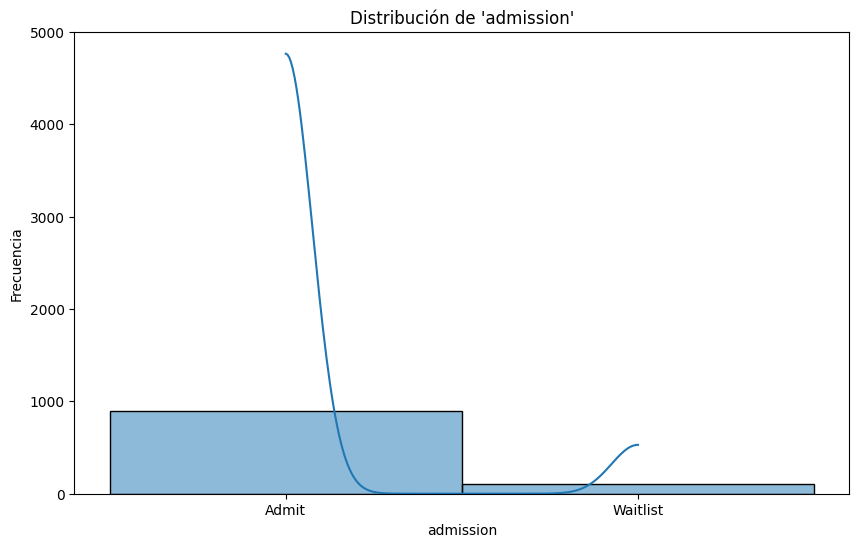

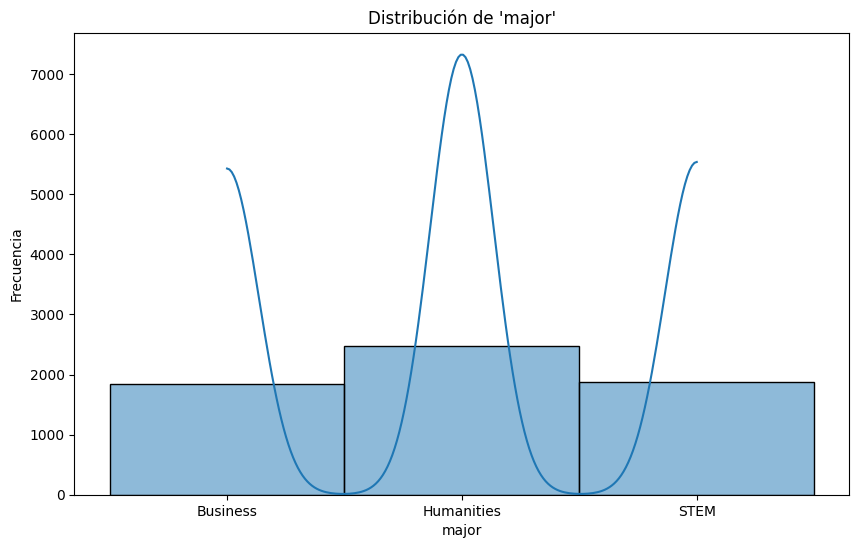

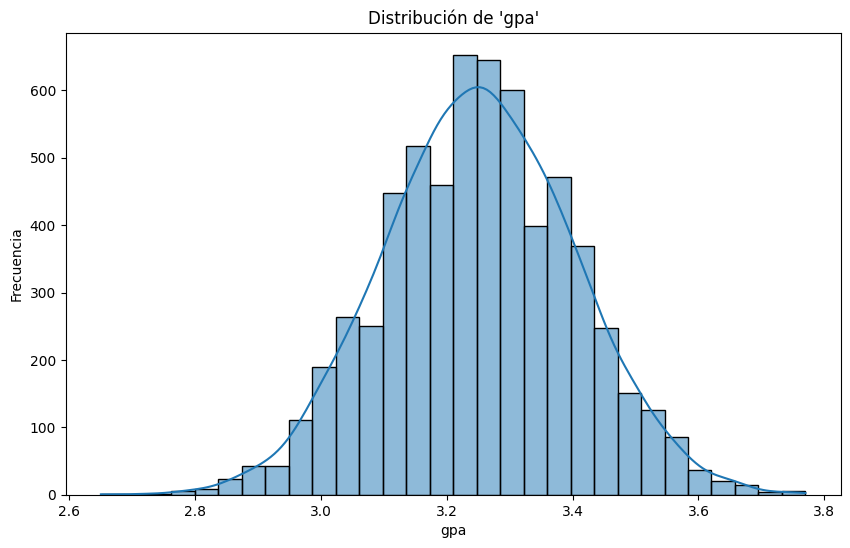

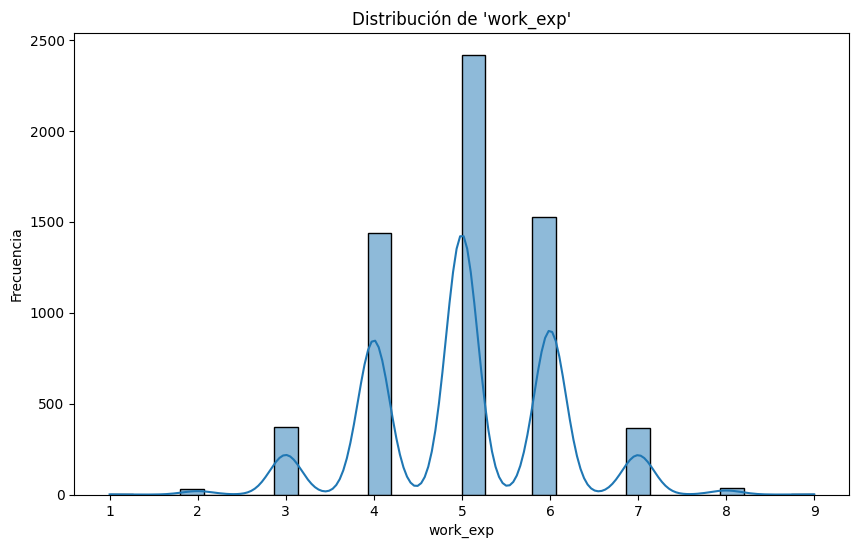

In [5]:
#Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)

# EDA - Análisis exploratorio de datos

# Histograma de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(df["admission"], bins=30, kde=True)
plt.title("Distribución de 'admission'")
plt.xlabel("admission")
plt.ylabel("Frecuencia")
plt.show()



#Distribución de algunas características numéricas
numerical_features = ["major", "gpa", "work_exp"]

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribución de '{feature}'")
    plt.xlabel(feature)
    plt.ylabel("Frecuencia")
    plt.show()


En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

Hay varias variables object que no se podran leer mas adelante, hay que convertirlas en continuas o hacer onehot encoding para que se pueda hacer un analisis correcto, adicionalmente la variable objetivo tiene valores null que significan que se declino la admision, deben rellenarse con "declined" y tambien aplicar un onehot encoding (admitido =0, declinado=1, lista de espera = 2), ya que por eso algunas estadisticas de la variable objetivo son erradas. Por ultimo la categoria race tiene valores nulos, los podemos rellenar con "No answer" para que haya valores validos y de hecho esa es una respuesta valida para esa pregunta

En cuanto a la distribucion, se ve que solo un porcentaje aproximado de 14% son admitidos directamente en el MBA, los demas son puestos en lista de espera o son rechazados. Para algunas variables educativas y profesionales se ve una distribucion normal en cuanto a los resultados.




## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [6]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

#Variable objetivo: admission, cambiar nulos por "Declined"
df["admission"].fillna("Declined", inplace=True)
df["admission"].value_counts()

#Variable race, nulos por "No_answer"
df["race"].fillna("No_answer", inplace=True)

#Variable international como int
df["international"] = df["international"].astype(int)

# Transformaciones de datos tipo string a numéricas usando One-Hot Encoding o Label Encoding según corresponda, para gender, major, race, work_industry
df_encoded = pd.get_dummies(df, columns=["gender", "major", "race", "work_industry"], drop_first=True)
df_encoded.head()

print(df_encoded.shape)
print(df_encoded.dtypes)

#descripcion del df_encoded
descripcion_encoded = df_encoded.describe(include='all')
descripcion_encoded

#label encoder para la variable objetivo admission

label_encoder = LabelEncoder()
df_encoded["admission"] = label_encoder.fit_transform(df_encoded["admission"])


#eliminamos el id del aspirante ya que no aporta información relevante para el modelo
df_encoded.drop(columns=["application_id"], inplace=True)

#escalamos los datos
scaler = StandardScaler()
atributos = df_encoded.drop(columns=["admission"])
atributos_scaled = scaler.fit_transform(atributos)
X = pd.DataFrame(atributos_scaled, columns=atributos.columns)
y = df_encoded["admission"]




(6194, 27)
application_id                           int64
international                            int64
gpa                                    float64
gmat                                   float64
work_exp                               float64
admission                               object
gender_Male                               bool
major_Humanities                          bool
major_STEM                                bool
race_Black                                bool
race_Hispanic                             bool
race_No_answer                            bool
race_Other                                bool
race_White                                bool
work_industry_Consulting                  bool
work_industry_Energy                      bool
work_industry_Financial Services          bool
work_industry_Health Care                 bool
work_industry_Investment Banking          bool
work_industry_Investment Management       bool
work_industry_Media/Entertainment         bool
wo

C:\Users\jonat\AppData\Local\Temp\ipykernel_12224\1831011854.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["admission"].fillna("Declined", inplace=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_12224\1831011854.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [7]:
#variable objetivo 1 = no admitido, 0 = admitido, 2 = lista de espera
df_encoded["admission"].value_counts()

admission
1    5194
0     900
2     100
Name: count, dtype: int64

## División del dataset en datos de entrenamiento y datos de test 

In [8]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

#realizamos  una division 80-20 siguiendo una estrategia estandar, se aplica estratificacion ya que es un problema de clasificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada: 26 Neuronas ya que tenemos cinco atributos
+ las capas intermedias: Usaremos tres capas intermedias, dado el tamaño del dataset y la cantidad de labels de la variable objetivo.
+ capa de salida: 3 neuronas, 1 variable objetivo, "admission" con 3 clases, 1 (no admitido), 0(admitido), 2(lista de espera)
+ funciones de activación: relu para las capas ocultas, softmax para la de salida

Al menos utiliza relu en algunas de las capas intermedias y utiliza softmax en la capa de salida.

In [9]:
# Código de la estructuración de la red
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[
1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(len(y.unique()), activation='softmax'))


e:\Tecnicas de IA\act2\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Código de la inspección del modelo de red

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,323 (16.89 KB)

 Trainable params: 4,323 (16.89 KB)

 Non-trainable params: 0 (0.00 B)

##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [11]:
#Código de ajuste y entrenamiento

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8174 - loss: 0.5341 - val_accuracy: 0.8224 - val_loss: 0.4465
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8411 - loss: 0.4028 - val_accuracy: 0.8274 - val_loss: 0.4471
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8418 - loss: 0.3901 - val_accuracy: 0.8194 - val_loss: 0.4406
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3802 - val_accuracy: 0.8174 - val_loss: 0.4394
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.3757 - val_accuracy: 0.8214 - val_loss: 0.4402
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8466 - loss: 0.3660 - val_accuracy: 0.8153 - val_loss: 0.4438
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8504 - loss: 0.3617 - val_accuracy: 0.8244 - val_loss: 0.4443
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8514 - loss: 0.3563 - val_accuracy: 0.

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

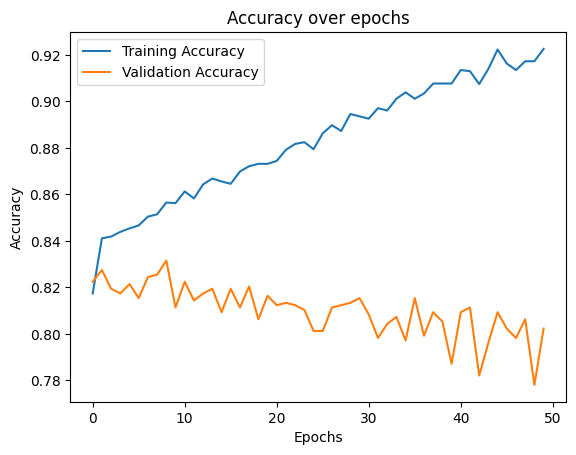

In [12]:
#Código de evaluación de la red propuesta (entrenamiento y validación)

plt.figure()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

## Prueba con menos capas y early stopping

# Código de la estructuración de la red
model = Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[
1],)))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(len(y.unique()), activation='softmax'))

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

#Código de ajuste y entrenamiento

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,callbacks=[early_stop])

Epoch 1/50


e:\Tecnicas de IA\act2\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8161 - loss: 0.5542 - val_accuracy: 0.8264 - val_loss: 0.4840
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8431 - loss: 0.4234 - val_accuracy: 0.8325 - val_loss: 0.4560
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8401 - loss: 0.4055 - val_accuracy: 0.8315 - val_loss: 0.4462
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.3970 - val_accuracy: 0.8295 - val_loss: 0.4395
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.3901 - val_accuracy: 0.8325 - val_loss: 0.4386
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8456 - loss: 0.3846 - val_accuracy: 0.8325 - val_loss: 0.4346
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8443 - loss: 0.3804 - val_accuracy: 0.8285 - val_loss: 0.4335
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3762 - val_accuracy: 0.8295 - val_

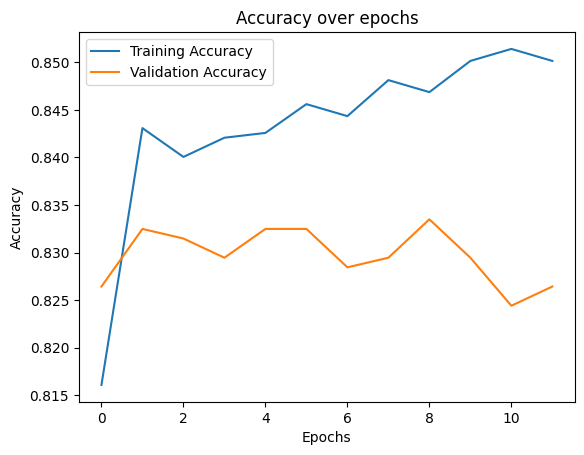

In [14]:
#Código de evaluación de la red propuesta (entrenamiento y validación)

plt.figure()

plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


### Evalúe los resultados  para el conjunto de test.

In [15]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1)
    


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [16]:
# Obtenemos la matriz de confusión de la predicción realizada
class_report = classification_report(y_test, predicted_classes)

# Mostramos la matriz de confusión
print(class_report)

              precision    recall  f1-score   support

           0       0.47      0.13      0.20       180
           1       0.85      0.98      0.91      1039
           2       0.00      0.00      0.00        20

    accuracy                           0.84      1239
   macro avg       0.44      0.37      0.37      1239
weighted avg       0.78      0.84      0.79      1239



e:\Tecnicas de IA\act2\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Tecnicas de IA\act2\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Tecnicas de IA\act2\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

In [17]:
#Código de ajuste del modelo 1
#Regresion logistica multiclase
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)


e:\Tecnicas de IA\act2\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [18]:
#Código de ajuste del modelo 2

In [19]:
#Código para mostrar la evaluación de los modelos
y_pred_logreg = logreg.predict(X_test)
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))


Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.38      0.61      0.47       180
           1       0.96      0.67      0.79      1039
           2       0.05      0.55      0.09        20

    accuracy                           0.66      1239
   macro avg       0.46      0.61      0.45      1239
weighted avg       0.86      0.66      0.73      1239



Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

+   Se ha encontrado que con la estructura de red neuronal simple feedforward planteada no fue suficiente para explicar el comportamiento completo del modelo, en la primera iteracion con 50 epochs y tres capas ocultas, el modelo tendia al overfitting ya que mientras la precision del train aumentaba, la de validacion disminuia, dado esto encontramos util restringir los epochs con early stopping y tambien reducir las capas, de esta manera se obtuvo un valor de precision mas estable para train y para validacion.

Adicional se escogio la regresion logistica multiclase como marco de referencia de control, este presento valores para la clase "waitlist" lo cual es muy positivo ya que la red neuronal ignoraba por completo el escoger esa clase como resultado.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [20]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

#matriz de confusión para regresión logística


print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))

#matriz de confusión para red neuronal
print("Reporte de clasificación para Red Neuronal:")
print(classification_report(y_test, predicted_classes))

df_comparison = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Red Neuronal"],  
    "Exactitud": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, predicted_classes)
    ],
    "recall": [
        skl.metrics.recall_score(y_test, y_pred_logreg, average='weighted'),
        skl.metrics.recall_score(y_test, predicted_classes, average='weighted')
    ],
    "F1-Score": 
    [
        skl.metrics.f1_score(y_test, y_pred_logreg, average='weighted'),
        skl.metrics.f1_score(y_test, predicted_classes, average='weighted')
    ]       
})  

df_comparison

e:\Tecnicas de IA\act2\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.38      0.61      0.47       180
           1       0.96      0.67      0.79      1039
           2       0.05      0.55      0.09        20

    accuracy                           0.66      1239
   macro avg       0.46      0.61      0.45      1239
weighted avg       0.86      0.66      0.73      1239

Reporte de clasificación para Red Neuronal:
              precision    recall  f1-score   support

           0       0.47      0.13      0.20       180
           1       0.85      0.98      0.91      1039
           2       0.00      0.00      0.00        20

    accuracy                           0.84      1239
   macro avg       0.44      0.37      0.37      1239
weighted avg       0.78      0.84      0.79      1239



e:\Tecnicas de IA\act2\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Tecnicas de IA\act2\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Modelo,Exactitud,recall,F1-Score
0,Regresión Logística,0.659403,0.659403,0.730328
1,Red Neuronal,0.836965,0.836965,0.792143


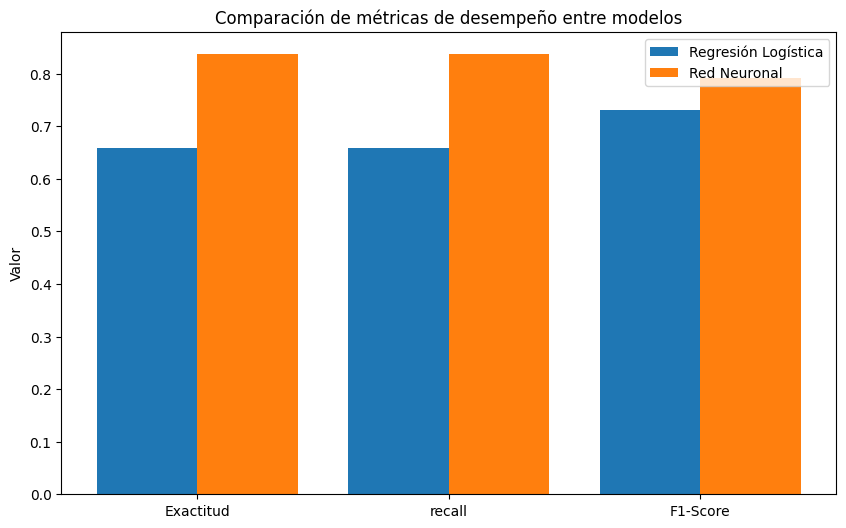

In [21]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

metrics = ['Exactitud', 'recall', 'F1-Score']
x = range(len(metrics))
reg_log_metrics = [
    accuracy_score(y_test, y_pred_logreg),
    skl.metrics.recall_score(y_test, y_pred_logreg, average='weighted'),
    skl.metrics.f1_score(y_test, y_pred_logreg, average='weighted')
]
nn_metrics = [
    accuracy_score(y_test, predicted_classes),
    skl.metrics.recall_score(y_test, predicted_classes, average='weighted'),
    skl.metrics.f1_score(y_test, predicted_classes, average='weighted')
]
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], reg_log_metrics, width
=0.4, label='Regresión Logística')
plt.bar([i + 0.2 for i in x], nn_metrics, width=0.4, label='Red Neuronal')
plt.xticks(x, metrics)
plt.ylabel('Valor')
plt.title('Comparación de métricas de desempeño entre modelos')
plt.legend()
plt.show()


Construya un párrafo con los principales hallazgos.

+ Se encuentra que en terminos globales la red neuronal tiene un mejor desempeño que la regresion logistica, sin embargo, no presento valores para la clase "lista de espera", por lo que
no representa una prediccion fiable para este caso particular, por otro lado la regresion logistica tiene un peor desempeño global pero predice clases minoritarias de mejor manera, por lo que puede ser 
un punto de control.


## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas.
    +   La red neuronal tiene un mejor desempeño en general y es la mejor alternativa para predecir el sistema, pero deben hacerse modificaciones adicionales, como reentrenar la red con una asignacion de pesos que permita a clases minoritarias tener una mejor representacion, ya que la regresion logistica si bien sirve como metodo de control, se queda corto con las posibilidades de la red neuronal para este problema multiclase que se complejiza con la cantidad de variables.
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
    + Segun los resultados obtenidos se obtiene un mejor resultado con la red neuronal, pero son engañosos a primera vista, ya que obtuvo un buen resultado basandose en ser castigado por no predecir una clase que es minoritaria (accuracy, recal y F1 de 0 para la clase "lista de espera"), por lo que no es una representacion fiable, por esta razon, asi como se presento el problema, la regresion logistica obtuvo un mejor resultado, pero la red neuronal tiene margen de mejora.
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.
    + La primera mejora seria tratar el problema de la clase minoritaria waitlist, ya sea incluyendola en alguna de las dos clases, o dandoles pesos a las clases de la red y reentrenando el modelo, considero que la mejor opcion es la primera ya que reduce complejidad y para el contexto en especifico se puede considerar que si un aspirante esta en lista de espera es porque cumplio con los requisitos pero los demas aspirantes obtuvieron mejores resultados. Bajo ese contexto, sin duda la red neuronal es la mejor opcion a emplear, por encima de la regresion logistica